
# 🦸‍♀️ Superhero Mini‑Project: How Tall is your average SuperHero?
**Duration:** 15–20 minutes  
**Tools:** Python, pandas, matplotlib  
**Dataset:** `heroes_information.csv` (already provided)

Welcome! Today you're a **data detective**. We'll use real superhero data to answer questions like:

- Who are the **tallest heroes** on average — Marvel or DC?
- How can we **clean messy data** (like wrong heights) so our answers are trustworthy?
- How can we get **subsets** of data (e.g., *all female heroes*)?

By the end, you'll have loaded, cleaned, explored, and **visualized** superhero data using Python.



## 🎯 Learning Goals
By the end of this mini‑project, you will:
1. Load and inspect a real dataset using **pandas**
2. Identify and fix **data quality** issues (like `-99.0` in height/weight)
3. Create **subsets** of your data using filters (e.g., all female heroes)
4. Compare groups using **groupby** (e.g., average height by publisher)
5. Visualize your results with **matplotlib**



## 1) Setup & Imports (Run me first)


In [5]:

import pandas as pd
import matplotlib.pyplot as plt

# Make plots show up in the notebook
%matplotlib inline

# Optional: widen the display a bit for readability
pd.set_option('display.max_columns', 50)



## 2) Load the Dataset
Let's read the CSV file into a pandas DataFrame and peek at the first few rows.


In [6]:

# Path to the dataset (already uploaded to this environment)
csv_path = "data/heros_information.csv"

heros = pd.read_csv(csv_path)
heros.head()


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0



## 3) First Look: What's in our Data?
We'll inspect the **columns**, **types**, and some basic **statistics**.


In [4]:

heroes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [ ]:
# lets see what the data looks like
heroes.head(20)


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,-,bad,81.0
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,6,Adam Monroe,Male,blue,-,Blond,183.0,NBC - Heroes,-,good,81.0
7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0



### 🔎 Data Quality Check
Notice anything odd? For example, sometimes datasets use placeholder values like **`-99.0`** for **unknown** height/weight.  
If we don't fix that, our averages and charts will be misleading.

👉 **Plan:** Replace `-99.0` with `NaN` (pandas' missing value), then fill missing heights/weights with the **median** value.
- **Why median?** It's less affected by extreme outliers than the mean.



## 4) Clean the Data
We'll replace placeholder values and handle missing values so our analysis is fair.


In [ ]:

# Replace placeholder numeric values (-99.0) with NA
heroes = heroes.replace(-99.0, pd.NA)

# Fill missing height/weight with the column median (robust to outliers)
heroes['Height'] = pd.to_numeric(heroes['Height'], errors='coerce')
heroes['Weight'] = pd.to_numeric(heroes['Weight'], errors='coerce')
heroes['Height'] = heroes['Height'].fillna(heroes['Height'].median())
heroes['Weight'] = heroes['Weight'].fillna(heroes['Weight'].median())

# Quick re-check
heroes[['Height','Weight']].describe()


,Height,Weight
count,734.000000,734.000000
mean,185.624659,102.076294
std,49.742700,86.748698
min,15.200000,2.000000
25%,178.000000,74.000000
50%,183.000000,81.000000
75%,185.000000,90.000000
max,975.000000,900.000000


- After a bit of clean up , the one line of code above shows the info of the tallest, shortest, heaviest, and lightest heroes




In [27]:
# lets find out the names of these heros
tallest_hero = heroes[heroes['Height'] == heroes['Height'].max()]
shortest_hero = heroes[heroes['Height'] == heroes['Height'].min()]
heaviest_hero = heroes[heroes['Weight'] == heroes['Weight'].max()]
lightest_hero = heroes[heroes['Weight'] == heroes['Weight'].min()]

print("The tallest hero is: ", tallest_hero.name.values[0], "with a height of", tallest_hero.Height.values[0], "cm")
print("The shortest hero is: ", shortest_hero.name.values[0], "with a height of", shortest_hero.Height.values[0], "cm")
print("The heaviest hero is: ", heaviest_hero.name.values[0], "with a weight of", heaviest_hero.Weight.values[0], "kg")
print("The lightest hero is: ", lightest_hero.name.values[0], "with a weight of", lightest_hero.Weight.values[0], "kg")




The tallest hero is:  Fin Fang Foom with a height of 975.0 cm
The shortest hero is:  Utgard-Loki with a height of 15.2 cm
The heaviest hero is:  Sasquatch with a weight of 900.0 kg
The lightest hero is:  Iron Monger with a weight of 2.0 kg



## 5) Getting a Subset: All Female Heroes
**Question:** How can we get a subset of **all female** characters?  
We use a **Boolean filter** on the `Gender` column.


In [9]:

female_heroes = heroes[heroes['Gender'] == 'Female']
len_female = len(female_heroes)
len_total = len(heroes)
print(f"Female heroes: {len_female} out of {len_total} total heroes")
female_heroes.head()


Female heroes: 200 out of 734 total heroes


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
24,24,Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,-,good,57.0
25,25,Angel Salvadore,Female,brown,-,Black,163.0,Marvel Comics,-,good,54.0
26,26,Angela,Female,-,-,-,183.0,Image Comics,-,bad,81.0
38,38,Arachne,Female,blue,Human,Blond,175.0,Marvel Comics,-,good,63.0



> ✅ **Try it yourself:** Change `"Female"` to `"Male"` or try another column like `Alignment` (e.g., `"good"`, `"bad"`, `"neutral"`).



## 6) Who Publishes the Tallest Heroes (on average)?
We'll compare the **average height** grouped by `Publisher`.  
Then we'll visualize the result with a simple bar chart.


In [10]:

publisher_height = heroes.groupby('Publisher', dropna=True)['Height'].mean().sort_values(ascending=False)
publisher_height


Publisher
J. R. R. Tolkien     279.000000
Microsoft            213.000000
Marvel Comics        189.271907
Rebellion            188.000000
Image Comics         185.000000
George Lucas         183.785714
Universal Studios    183.000000
Titan Books          183.000000
SyFy                 183.000000
South Park           183.000000
NBC - Heroes         183.000000
ABC Studios          183.000000
J. K. Rowling        183.000000
Icon Comics          183.000000
IDW Publishing       183.000000
HarperCollins        183.000000
Hanna-Barbera        183.000000
Wildstorm            183.000000
Star Trek            182.500000
Team Epic TV         182.200000
DC Comics            181.574419
Dark Horse Comics    179.277778
Sony Pictures        179.000000
Shueisha             171.500000
Name: Height, dtype: float64

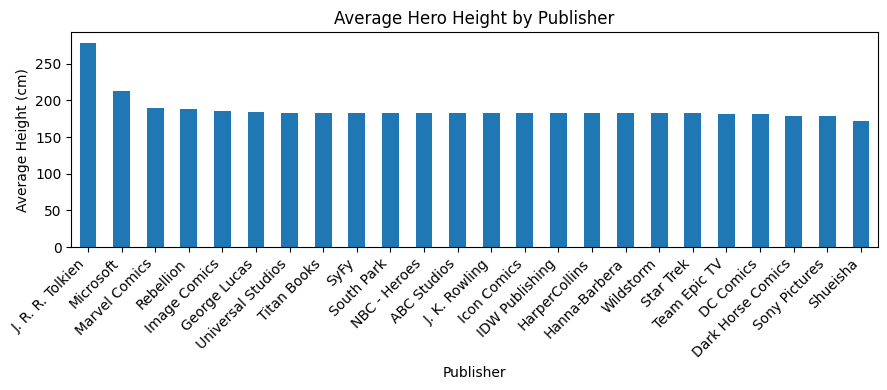

In [11]:

# Bar chart of average height by publisher
publisher_height.plot(kind='bar', figsize=(9,4))
plt.title("Average Hero Height by Publisher")
plt.xlabel("Publisher")
plt.ylabel("Average Height (cm)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### (Optional View) Marvel vs DC Focus
Sometimes it's easier to compare the two biggest publishers directly.


In [12]:

top_publishers = heroes[heroes['Publisher'].isin(['Marvel Comics', 'DC Comics'])]
marvel_dc_height = top_publishers.groupby('Publisher')['Height'].mean().sort_values(ascending=False)
marvel_dc_height


Publisher
Marvel Comics    189.271907
DC Comics        181.574419
Name: Height, dtype: float64

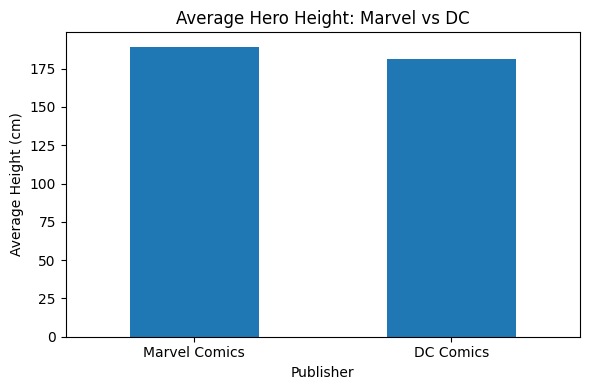

In [13]:

marvel_dc_height.plot(kind='bar', figsize=(6,4))
plt.title("Average Hero Height: Marvel vs DC")
plt.xlabel("Publisher")
plt.ylabel("Average Height (cm)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


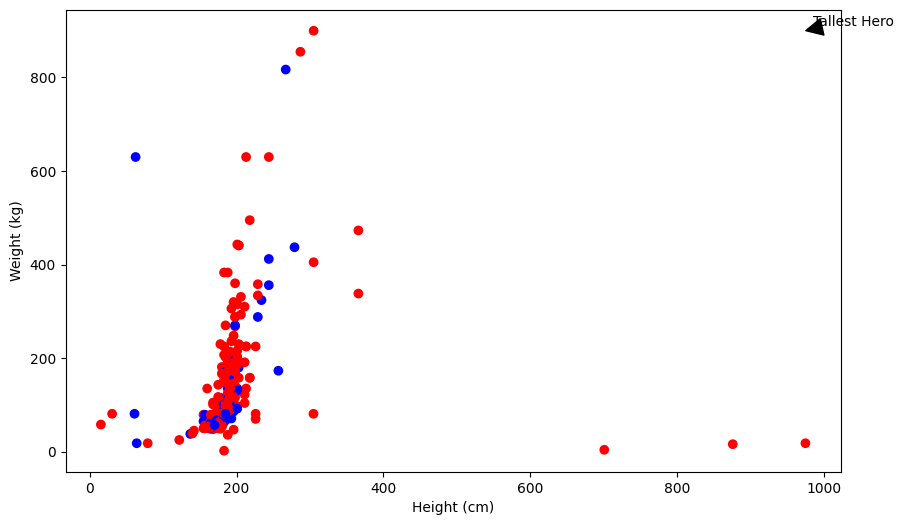

In [ ]:
# lets include a scatter plot of height  vs weight of heros and color code marvel and dc characters

# First, we'll create a new dataframe that only includes the heroes from Marvel and DC
marvel_dc_heroes = heroes[heroes['Publisher'].isin(['Marvel Comics', 'DC Comics'])]

# Now, we'll create a scatter plot of height vs weight
plt.figure(figsize=(10, 6))
plt.scatter(marvel_dc_heroes['Height'], marvel_dc_heroes['Weight'], c=marvel_dc_heroes['Publisher'].map({'Marvel Comics': 'red', 'DC Comics': 'blue'}))
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')




## 7) Reflect & Explain (Exit Ticket)
- What surprised you about the results?
- Why was **data cleaning** important today?
- If you changed how we filled missing values (mean vs median), how might the results differ?
- (Bonus thought) How would the answer change if we only looked at **good** heroes?

---

_Last updated: 2025-10-21 18:25 UTC_
